# SD202 TP3 - Views, Updates and Database Design
##### Nom : LEE Joe Ing 
##### Date : 14/06/2022
***

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a marketplace


For the first 2 parts we will use the _wine_ database and the Tables created in TP2.

A reminder of the wine database schema:

In [1]:
import sqlite3

In [2]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [3]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(NUM)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
Table_Achat:
  0: NV(NUM)
  1: NB(NUM)
  2: DATES(NUM)
  3: LIEU(TEXT)
  4: QTE(NUM)
Table_Client:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
Table_Place:
  0: LIEU(TEXT)
  1: REGION(TEXT)
Table_Vin2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)


Again, we recommend inline %sql as an alternative to the sqlite3 package

In [4]:
%load_ext sql
%sql sqlite:///wine.db

'Connected: @wine.db'

Recreate the Tables in 3NF/BCNF from Master2 as you did in the TP2

In [5]:
# Write corresponding code here

%sql DROP TABLE IF EXISTS Table_Vin2;
%sql DROP TABLE IF EXISTS Table_Client;
%sql DROP TABLE IF EXISTS Table_Achat;
%sql DROP TABLE IF EXISTS Table_Place;

# Create NV table
%sql CREATE TABLE Table_Vin2 AS \
SELECT DISTINCT NV, CRU, DEGRE, MILL \
FROM MASTER2 \
WHERE NV is not null;


# Create NP table
%sql CREATE TABLE Table_Client AS \
SELECT DISTINCT NB, NOM, PRENOM, TYPE \
FROM MASTER2 \
WHERE NB is not null;

# Create NV,NP table
%sql CREATE TABLE Table_Achat AS \
SELECT DISTINCT NV, NB, DATES, LIEU, QTE \
FROM MASTER2 \
WHERE NV and NB is not null;


# Create NV,NP table
%sql CREATE TABLE Table_Place AS \
SELECT DISTINCT LIEU, REGION \
FROM MASTER2 \
WHERE LIEU is not null;


print("\nContent of the database")
printSchema(conn)

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.

Content of the database
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(NUM)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
Table_Achat:
  0: NV(NUM)
  1: NB(NUM)
  2: DATES(NUM)
  3: LIEU(TEXT)
  4: QTE(NUM)
Table_Client:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
Table_Place:
  0: LIEU(TEXT)
  1: REGION(TEXT)
Table_Vin2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)


___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```sql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command is:

```sql
DROP VIEW IF EXISTS view_name;
```


__Note:__ Use it with caution (only drop something if you are sure)

__1.1__ Create a view 'bons_buveurs' with the clients (buveurs) of type 'gros' or 'moyen'.

In [6]:
%%sql 
DROP VIEW IF EXISTS bons_buveurs;

CREATE VIEW bons_buveurs AS 
SELECT *
FROM Table_Client
WHERE TYPE = "gros" or TYPE = "moyen";

 * sqlite:///wine.db
Done.
Done.


[]

In [7]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


__1.2__ Create the view 'buveurs_asec' with clients (buveurs) who have not bought any wine.

In [8]:
%%sql 
DROP VIEW IF EXISTS buveurs_asec;

CREATE VIEW buveurs_asec AS 
SELECT *
FROM Table_Client
WHERE NB not in (SELECT Table_Achat.NB FROM Table_Achat);

 * sqlite:///wine.db
Done.
Done.


[]

In [9]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


__1.3__ Create the view 'buveurs_achats' complementary to the previous one.

In [10]:
%%sql 
DROP VIEW IF EXISTS buveurs_achats;

CREATE VIEW buveurs_achats AS 
SELECT *
FROM Table_Client
WHERE NB not in (SELECT buveurs_asec.NB FROM buveurs_asec);

 * sqlite:///wine.db
Done.
Done.


[]

In [11]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


__1.4__ Create the view 'q83pl' (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [63]:
%%sql 
DROP VIEW IF EXISTS q83pl;

CREATE VIEW q83pl AS 
SELECT LIEU, CRU, SUM(QTE) AS QTE_BUE
FROM Table_Achat
INNER JOIN Table_Vin2 ON Table_Vin2.NV = Table_Achat.NV
WHERE (strftime('%Y',DATES) = "1983")
GROUP BY LIEU, CRU;

 * sqlite:///wine.db
Done.
Done.


[]

In [64]:
# Test
%sql SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


__1.5__ Can we define the same view with ascending order over the attribute QTE? Provide an explanation for your answer.

In [73]:
%%sql 
DROP VIEW IF EXISTS q83pl1;

CREATE VIEW q83pl1 AS 
SELECT LIEU, CRU, SUM(QTE) AS QTE_BUE
FROM Table_Achat
INNER JOIN Table_Vin2 ON Table_Vin2.NV = Table_Achat.NV
WHERE (strftime('%Y',DATES) = "1983")
GROUP BY LIEU, CRU
ORDER BY QTE;

SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.
Done.
Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


<div class="alert alert-block alert-warning">
<b>Answer:</b> Technically, it is possible to create a sql query with ascending order over the attribute QTE in sqlite but it does not make sense to define the view by having ORDER BY. A view is a logical table in memory and it has no order, hence views are not meant to dictate presentation order and cannot be sorted with an ORDER BY clause. When we want to present the view in an ascending order, the workaround is to put the ORDER BY clause into any query that references the view. (refer to question 2.1)

</div>

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the Update statement is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the Insert statement is:

```sql
INSERT INTO TABLE_NAME [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```


Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you may not execute a DELETE, INSERT or UPDATE statement on a view.

__2.1__ Create a table 'RBB' with the same schema as 'bons_buveurs' which contains the tuples selected from 'bons_buveurs'

In [77]:
%%sql DROP TABLE IF EXISTS RBB;

CREATE TABLE RBB AS
SELECT *
FROM bons_buveurs;

 * sqlite:///wine.db
Done.
Done.


[]

In [80]:
# Test
%sql SELECT * FROM RBB ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


__2.2__ Update the table you used to create 'bons_buveurs': Change the 'type' to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may be different from the one in your table)

In [118]:
%%sql 
SELECT SUB.NB, NOM, PRENOM, TYPE, TOTAL  
FROM (SELECT NB, SUM(QTE) AS TOTAL FROM Table_Achat
GROUP BY NB
HAVING TOTAL >100) SUB
INNER JOIN Table_Client ON SUB.NB = Table_Client.NB
WHERE TYPE !="gros"
ORDER BY SUB.NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE,TOTAL
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


Update instances

In [126]:
%%sql
UPDATE Table_Client
SET TYPE = "gros"
WHERE NB in (SELECT SUB.NB  
             FROM (SELECT NB, SUM(QTE) AS TOTAL FROM Table_Achat
             GROUP BY NB
             HAVING TOTAL >100) SUB
             INNER JOIN Table_Client ON SUB.NB = Table_Client.NB
             WHERE TYPE !="gros");

 * sqlite:///wine.db
4 rows affected.


[]

__2.3__ Compare the content of _table_ 'RBB' and the _view_ 'bons_buveurs' after the update. What differences do you see? Explain

In [136]:
%%sql
SELECT * FROM RBB WHERE NB in (2,5,9,44);

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen


In [137]:
%%sql 
SELECT * FROM bons_buveurs WHERE NB in (2,5,9,44) ORDER BY NB; 

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,gros
5,Audiberti,Jacques,gros
9,Ajar,Emile,gros
44,Gide,Andre,gros


<div class="alert alert-block alert-warning">
<b>Answer:</b> We see that the Table RBB is not updated but the View bons_buveurs is updated. This is because the view is a logical stored SELECT statement that masquerades as a table. Therefore, the tuples of the view is independent from the table that make up the view, and each time when we make the query to the View, the tuples are assembled from the orginal table. 
    
<br>
    
In our case, the original table (Table_Client) is updated, hence the view (bons_buveurs) is updated when I do the query. However, the table (RBB) is a physically stored relation in the memory, hence, it will not be updated unless we make an extra query to do so. 
</div>

__2.4__ Create a table 'RBA' with the same schema as 'buveurs_asec' which contains the tuples selected from 'buveurs_asec'

In [138]:
%%sql DROP TABLE IF EXISTS RBA;

CREATE TABLE RBA AS
SELECT *
FROM buveurs_asec;

 * sqlite:///wine.db
Done.
Done.


[]

In [140]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


__2.5__ Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to 'RBA'

In [142]:
%%sql
INSERT INTO RBA
VALUES (101, "Lee", "Joe Ing","gros");

 * sqlite:///wine.db
1 rows affected.


[]

In [143]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


__2.6__ Compare the content of _table_ 'RBA' and the _view_ 'buveurs_asec'. What differences do you see? Explain

In [144]:
%%sql 
SELECT * FROM buveurs_asec WHERE NB = 101 ORDER BY NB; 

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE


In [146]:
%%sql 
SELECT * FROM RBA WHERE NB = 101 ORDER BY NB; 

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
101,Lee,Joe Ing,gros


<div class="alert alert-block alert-warning">
<b>Answer:</b> We see that the Table RBA is updated but the View buveurs_asec is not updated. This is because the the tuples of the view are assembled from the orginal table (Table_Client) but not the table RBA. There is not independance between the table created from the view and the view itself. 
    
</div>

___
# PART III: Design the database schema for a marketplace

We consider the following scenario:

You are a developer for a game. In the game, there are several kinds of objects that the players can collect (e.g. magical flowers, gems, etc.). Players can also sell or buy objects from a marketplace that works in the following way: players declare some of the objects in their possession as “buyable”
with a price for each buyable object and then any player can buy items marked as buyable. When a player buys an item, the possession of the item is transferred to the buyer while the money corresponding to the item is transferred from the buyer to the seller. Note that, as long as the item is not sold, it still belongs to the player. Your goal is to
create a database for this marketplace.

The database schema you will develop needs to support players, the money each player has, the various types
of objects present in the game and how many objects of each kind each player has.Your database need to be able
to support the following kind of operations:

* Create a new type of object or add new players,
* Change the name of a type of objects or the name of a player,
* Attribute an object of a given type to a player,
* Increase or decrease the amount of money a player has,
* Retrieve the list of all the items that a player has,
* Compute the current balance of a player,
* Allow a player to mark one of their item as buyable with a given price,
* Allow a player to buy the cheapest item of a given type from the marketplace.

Ideally your schema should enforce the following constraints:

* All the objects that the players have correspond to some known type,
* Each object is possessed by exactly one player,
* Any single object cannot be marked twice as buyable, nor it can have two different prices (but two different objects of the same kind can have different prices),
* Any player has a positive amount of money.

__3.1__ Draw an entity-relationship model for the scenario.

_to answer, you can for example join a figure with the notebook or write the information related to the entity and relationship sets_

<div class="alert alert-block alert-info">
<b>Note:</b> We have two entities (Players and Objects) and a relation (Possession). Each player has an ID (key), a name and certain amount of money. <b>(Constraint 4: Any player has a positive amount of money)</b>. There are several types of objects (magical flowers, gems etc.) and each type of object has it own ID_Type. 
    
<br>
    
Player possess objects which can be sold or bought. These data are defined in the possession relation. The possession relation contains all the objects in the game. Each object has it own ID_Object and its only owner (ID_Player). <b>(Constraint 2: Each object is possessed by exactly one player)</b>. Each object has a type, hence it contains the attribute of ID_Type as foreign key. <b>(Constraint 1: All the objects that the players have correspond to some known type)</b>. Finally, each object one price tag, if the player declares their object as “buyable”, then the price will not be null.    
<br>
   
Since the possession relation contains the ID_Player and Price, when a player buys or sell an item, it is possible to add or deduce money based on the price and since the possession relation contains the ID_Type, we can easily know the type of each object. It is a one to many relation as one player can have multiple objects while one object can only be possessed by one player. 
    
</div>

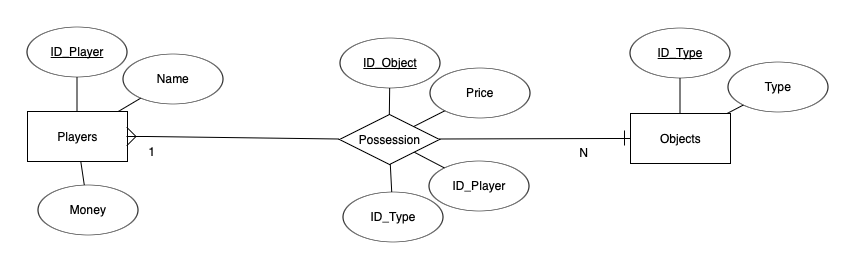

__3.2__ Deduce the relational scheme while precising the _primary_ and _foreign_ (if any) keys for each relation.

<div class="alert alert-block alert-info">
<b>Note:</b> To transform an ER Model to relational schema, we need to check whether there is any One to One cardinality in order to simplify the relations. In our case, there is no 1-to-1 cardinality, hence, we can just use the ER model to create our relational schema. 

<br>
    
We have 3 relations : 
    
1. <b> Players (ID_Player, Name, Money)</b> : 3 attributes with ID_Player as unique key 
2. <b> Objects(ID_Type, Type)</b>  : 2 attributes with ID_Type as unique key 
3. <b> Possesion(ID_Object, Price, ID_Player, ID_Type)</b>  : 4 attributes with ID_Object as unique key and two foreign keys (ID_Player, ID_Type) to link this relation to the other two. 
</div>

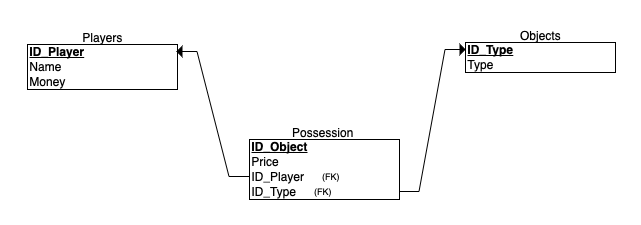

#### Verify the operations: 

- [x] Create a new type of object or add new players
- [x] Change the name of a type of objects or the name of a player
- [x] Attribute an object of a given type to a player
- [x] Increase or decrease the amount of money a player has
- [x] Retrieve the list of all the items that a player has
- [x] Compute the current balance of a player
- [x] Allow a player to mark one of their item as buyable with a given price
- [x] Allow a player to buy the cheapest item of a given type from the marketplace

***